# Logistic Regression

Misal regresi linear yang digunakan untuk memprediksi suatu nilai variabel dependen memiliki rumus $$ y = \theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{n} x_n  $$

Maka rumus regresi logistik yang digunakan untuk mengategorikan secara biner dua variabel adalah

$$ Ln(\frac{P}{1-P}) = \theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{n} x_n  $$


atau dapat dituliskan $$ P =  \frac{e^{\theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{n} x_n}}{1+e^{\theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{n} x_n}} $$ atau $$P =  \frac{1}{1+e^{-(\theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{n} x_n)}} $$
$$P =  \frac{1}{1+e^{-\hat{y}}} $$


Secara mudah, kita dapat menggunakan gradient descent seperti pada rumus regresi linear. Untuk klasifikasi kategorinya

$$ P = \{^{\ge0.5,class=1 }_{<0.5,class=0}  $$

Sehingga, rumus konvergensinya dengan cost function Binary Cross Entropy adalah

$$ \theta_j = \theta_j - \alpha \frac{1}{n} \frac{\partial }{\partial \theta_j} - \sum_{i=1}^{n} y_{i} ln(h_{\theta}(x_{i})) + (1-y_{i}) ln(1-h_{\theta}(x_{i}))  $$

di mana

$$ h_{\theta}(x_{i}) = \frac{1}{1+e^{-(\theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{n} x_n)}}  $$

- $ y_{i} $ bernilai 1 atau 0 sesuai kelasnya
- Sebenarnya, kita juga bisa menggunakan cost function MSE. Namun untuk klasifikasi biner, cost function BCE akan lebih akurat.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=3, suppress=False)

In [2]:
iris = datasets.load_iris( as_frame=True)
df = iris.data
iris.target
df['is_setosa'] =0
for i in range(len(df)):
    if iris.target[i] == 0:
        df.loc[i, 'is_setosa'] = 1
    else:
        df.loc[i, 'is_setosa'] = 0
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_setosa
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [3]:
# 5 Data terakhir
# Bwt = Berat kucing
# Hwt = Berat hati kucing
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_setosa
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0
149,5.9,3.0,5.1,1.8,0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_setosa
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


Analisis Logistic Regression mirip dengan Linear Regression, namun alih-alih menggunakan Fungsi Linear, kita menggunakan fungsi Sigmoid

In [5]:
import torch

In [6]:
X = df.drop(['is_setosa'], axis=1).values


In [7]:
Y = df['is_setosa'].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [9]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [10]:
learningRate = 0.1
epochs = 1000

m = len(x_train) #Jumlah data
n = len(x_train[0]) #Jumlah parameter
X_tensor = torch.from_numpy(x_train.reshape( m, n)).float() #Membuat tensor dari data input
Y_tensor = torch.from_numpy(y_train.reshape( m, 1)).float() #Membuat tensor dari data output

model = LogisticRegression(n, 1)

if torch.cuda.is_available():
    model = model.cuda()

In [11]:
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
criterion = torch.nn.BCELoss()

In [12]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = X_tensor.cuda()
        targets = Y_tensor.cuda()
    else:
        inputs = X_tensor
        targets = Y_tensor
    
    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 25 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))

Epoch [25/1000], Loss: 0.1463
Epoch [50/1000], Loss: 0.0927
Epoch [75/1000], Loss: 0.0684
Epoch [100/1000], Loss: 0.0545
Epoch [125/1000], Loss: 0.0454
Epoch [150/1000], Loss: 0.0391
Epoch [175/1000], Loss: 0.0344
Epoch [200/1000], Loss: 0.0307
Epoch [225/1000], Loss: 0.0278
Epoch [250/1000], Loss: 0.0254
Epoch [275/1000], Loss: 0.0234
Epoch [300/1000], Loss: 0.0218
Epoch [325/1000], Loss: 0.0203
Epoch [350/1000], Loss: 0.0191
Epoch [375/1000], Loss: 0.0180
Epoch [400/1000], Loss: 0.0170
Epoch [425/1000], Loss: 0.0161
Epoch [450/1000], Loss: 0.0153
Epoch [475/1000], Loss: 0.0146
Epoch [500/1000], Loss: 0.0140
Epoch [525/1000], Loss: 0.0134
Epoch [550/1000], Loss: 0.0129
Epoch [575/1000], Loss: 0.0124
Epoch [600/1000], Loss: 0.0119
Epoch [625/1000], Loss: 0.0115
Epoch [650/1000], Loss: 0.0111
Epoch [675/1000], Loss: 0.0108
Epoch [700/1000], Loss: 0.0104
Epoch [725/1000], Loss: 0.0101
Epoch [750/1000], Loss: 0.0098
Epoch [775/1000], Loss: 0.0096
Epoch [800/1000], Loss: 0.0093
Epoch [825/

In [13]:
PredictionProbability = model(torch.from_numpy(x_test).float().cuda()).cpu().detach().numpy()

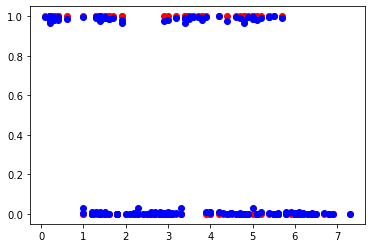

In [14]:
plt.plot(x_test, y_test, 'ro')
plt.plot(x_test, PredictionProbability, 'bo')
plt.show()

Confusion Matrix untuk klasifikasi Biner dapat dinyatakan dalam bentuk berikut:
$$
\begin{bmatrix}
True\; Positive & False\; Negative \\
False\; Positive & True\; Negative
\end{bmatrix}$$

Untuk confusion matrix dengan lebih dari dua klasifikasi, suatu model dikatakan bagus jika model tersebut membentuk confusion matrix yang mirip dengan matriks diagonal

In [15]:
from sklearn.metrics import confusion_matrix

[[1. 0.]
 [0. 1.]]


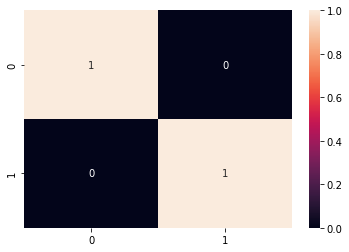

In [16]:
cf = confusion_matrix(y_test, PredictionProbability > 0.5, normalize='true')
sns.heatmap(cf, annot=True)
print(cf)